# MATH&ML-7 Теория вероятностей в контексте наивного байесовского классификатора.
###  Содержание <a class="anchor" id=0></a>

- [1. Введение](#2)
- [2. Классическая верочтность. Сложение и умножение](#2)
- [3. Условная вероятность](#3)
- [4. Полная вероятность](#4)
- [5. Теорема Байеса](#5)
- [6. Наивный бейсовский классификатор: практика](#6)
- [7. Случайная величина и её характеристики](#7)
- [8. Дискретные распределения](#8)
- [9. Неприрывные распределения](#9)
- [10. Итоги](#10)

# 1. Введение <a class="anchor" id=0></a>

[к содержанию](#0)

>**Детерминированность** — это ситуация, в которой одно и то же действие всегда приводит к одному и тому же результату.

Но что, если вы бросаете два кубика и делаете ставку на сумму? Какое число выбрать для ставки?

Может показаться, что сумма очков на двух равновероятных кубиках также равновероятна, но это не так: 6 и 7 будут выпадать гораздо чаще, чем 2 или 12. Для наглядности можно отобразить все возможные комбинации в таблице:

|  | **1** | **2** | **3** | **4** | **5** | **6** |
| - | - | - | - | - | - | - |
| **1** |(1,1)|(1,2)|(1,3)|(1,4)|(1,5)|(1,6)|
| **2** |(2,1)|(2,2)|(2,3)|(2,4)|(2,5)|(2,6)|
| **3** |(3,1)|(3,2)|(3,3)|(3,4)|(3,5)|(3,6)|
| **4** |(4,1)|(4,2)|(4,3)|(4,4)|(4,5)|(4,6)|
| **5** |(5,1)|(5,2)|(5,3)|(5,4)|(5,5)|(5,6)|
| **6** |(6,1)|(6,2)|(6,3)|(6,4)|(6,5)|(6,6)|

Как видите, для того, чтобы выпало 12 , нужны две шестёрки, а, например, для 7 есть много вариантов, поэтому шанс угадать больше. Но насколько больше? В целом, поскольку у нас выписаны все варианты, мы можем примерно понять, насколько чаще в сумме будет выпадать 7, а не 12.

<img src=m7_img1.png width=300>

Тогда всё становится ещё сложнее. Выписывать все варианты мы уже не сможем, так как их слишком много.

<img src=m7_img2.png width=600>

>Здесь нам уже понадобится **теория вероятностей** — наука, которая позволяет сделать предположения о более простых вероятностях (об очках на одном кубике) и на их основе математически вывести гораздо более сложные (об очках на нескольких кубиках). К примеру, теория вероятностей помогает ответить на вопрос: «На что ставить, чтобы увеличить шансы на выигрыш?»

Мы не случайно начали юнит с примера про кубики: именно попытки предсказать вероятности выигрыша в такие азартные игры, как игральные кости или орлянка несколько столетий назад дали стимул развитию этой области математики. Но, разумеется, теория вероятностей широко используется и по сей день и может быть полезна не только для того, чтобы оценить свои шансы в казино.

Изучение вероятности важно, так как она имеет дело с количественными оценками ситуаций с неопределёнными результатами.

* При **производстве** какого-то продукта всегда неясно, получится ли он с дефектом. Тестирование каждого продукта, который должен выйти в продажу, было бы невероятно дорогим и трудозатратным. Однако понимание вероятности дефекта позволяет заранее заложить её в издержки и проработать политику решения ситуаций с бракованными товарами.

* Также всякий раз, когда человек вкладывает деньги в акции, он, осознавая это или нет, занимается оценками вероятностей. Каждая **инвестиция** имеет некоторую степень неопределённости: никто не может быть уверен, какова будет стоимость акций в будущем. Инвестируя деньги в акции, вы, по сути, предполагаете высокую вероятность того, что эти акции вырастут в цене. Продажа же акций означает, что вы оцениваете вероятность падения цены как довольно большую. Профессиональные финансовые аналитики, как правило, уделяют много внимания оценкам вероятности при просчёте своих рисков. Они используют исторические данные и огромный поток ежедневной информации, чтобы определить вероятность увеличения или уменьшения стоимости инвестиций.

* Вероятностные модели также постоянно используются в **анализе данных**: в алгоритмах классификации и прогнозирования, а также при построении рекомендательных систем и в стохастических алгоритмах оптимизации.

* Если мы хотим построить алгоритм, который будет рекомендовать фильмы пользователю сервиса, для каждого фильма необходимо рассчитать вероятности, выражающие соответствие фильма предпочтениям человека. После этого можно будет предложить пользователю те фильмы, у которых эти вероятности наибольшие.

* Если вы сможете собрать данные о том, какие вопросы и как часто встречаются на собеседованиях на позицию специалистов по машинному обучению, то сможете предсказать вероятность столкнуться с задачей на тему данного модуля при трудоустройстве.

***
>Под **случайным экспериментом** понимается такой эксперимент, результат которого не детерминирован изначально.

Предположим, если мы заходим на наш сайт в какой-то случайный момент времени и узнаём количество пользователей, находящихся на сайте в данный момент, мы совершаем случайный эксперимент, ведь заранее никак нельзя предугадать, сколько точно людей будет на сайте в то или иное время.

>Приведём ещё несколько примеров случайных экспериментов:
>
>* подбрасывание игральной кости;
>* вытаскивание карты из колоды;
>* подсчёт числа людей, находящихся в помещении;
>* выстрел по мишени;
>* сдача студентом экзамена;
>* запуск случайной песни из плейлиста.

Все вышеперечисленные эксперименты объединяет то, что каждый раз мы не можем точно знать, что получится в итоге — результаты могут быть разными. Например, если мы открываем плейлист и просим плеер выбрать случайную песню, то в результате слышим одну из песен, которые мы уже выбрали ранее. Или, если мы берём колоду карт и вытягиваем одну из них, то в результате получаем карту какой-то определённой масти и достоинства.

>Так появляется понятие **элементарного исхода** — любого возможного исхода случайного эксперимента. Например, если вернуться к примеру про количество пользователей на сайте, то все элементарные исходы — это все возможные количества посетителей на сайте.
>
>Разумеется, по результатам эксперимента обычно может получаться много различных результатов (элементарных исходов). Всё множество таких исходов носит называется пространством элементарных исходов и обычно обозначается буквой $\Omega$ (омега).

Ниже можно увидеть примеры случайных экспериментов и пространства элементарных исходов:

| **СЛУЧАЙНЫЙ ЭКСПЕРИМЕНТ** | **ПРОСТРАНСТВО ЭЛЕМЕНТАРНЫХ ИСХОДОВ** |
| - | - |
| Сдача экзамена TOEFL | Любое число от 0 до 120 |
| Бросок одного шестигранного кубика | 1, 2, 3, 4, 5, 6 |
| Попытка устроиться на определённую должность | 	«Устроился» ли «не устроился» |
| Подбрасывание монетки два раза | ОО, ОР, РО, РР, где Р — это решка, а О — орёл |


# 2. Классическая верочтность. Сложение и умножение <a class="anchor" id=2></a>

[к содержанию](#0)

Вероятностью случайного события $A$ называется отношение числа $n$ равновероятных элементарных исходов, составляющих событие $A$, к числу всех возможных элементарных исходов $N$:

$P(A)=\frac{n}{N}$

Элементарные исходы, составляющие событие $A$, также очень часто называют исходами, **благоприятными или благоприятствующими для события** $A$.

>Вы работаете в компании, которая разрабатывает новое лекарство.
>
>В клинических испытаниях участвовали `2800` человек. Ухудшение состояния было зарегистрировано у `7` из них.
>
>Необходимо понять, какова вероятность, что новое лекарство вызовет ухудшение состояния пациента, так как, если она велика, то лекарство требует доработки.
>

Итак, в данном случае $2800$ — это общее количество исходов события, а $7$ — количество благоприятных исходов. Согласно определению вероятности, вероятность серьёзных побочных эффектов вычисляется следующим образом:

$\frac{7}{2800}=0.0025$

Можно также сказать, что вероятность — это число, которое оценивает степень возможности наступления того или иного случайного события. Вероятности всегда находятся в диапазоне **от 0 до 1 включительно**:

$0 \leq P(A) \leq 1$

Чем больше полученное значение, тем более вероятно, что событие произойдёт. Вероятность $0$ означает, что событие **никогда не случится**. Такое событие называют **невозможным**:

$P(A)=P(\oslash)=\frac{n}{N}=\frac{0}{N}=0$

Вероятность 1 означает, что событие произойдёт **в любом случае** — такое событие называют **достоверным**:

$P(A)=P(\Omega)=\frac{n}{N}=\frac{N}{N}=1$

Все остальные значения от 0 до 1 представляют различные уровни вероятности.


***

>**Дополнение события** $A$ — это подмножество таких исходов во всём пространстве исходов, что они не благоприятствуют событию $A$. Дополнение события $A$ само по себе тоже является событием и обозначается как $\overline{A}$.

Важно понимать, что у события и дополнения к нему нет общих исходов, то есть они взаимоисключающие или, как это обычно называют в теории вероятностей, несовместные. Также событие и дополнение к нему содержат в сумме абсолютно все исходы из пространства исходов. Из этого следует, что сумма их вероятностей равняется одному:

$P(A)+P\left(\overline{A}\right)=1$

Например, если мы знаем, что вероятность того, что пойдёт дождь, равна $0.7$, то вероятность того, что дождя не будет, равна $1-0.7=0.3$. События «пойдёт дождь» и «дождя не будет» являются **несовместными**, так как не может быть, чтобы одновременно шёл дождь и его не было. Также они покрывают всё пространство исходов, так как никаких других вариантов быть не может.

Если у нас есть любое количество взаимоисключающих событий, которые описывают абсолютно все возможные элементарные исходы, то сумма их вероятностей равна 1:

$P\left(A_{1}\right)+P\left(A_{2}\right)+P\left(A_{3}\right)+\ldots+P\left(A_{n}\right)=1$



## ПРАВИЛО СУММЫ

>Вероятностное **правило суммы** используется в ситуациях, когда необходимо найти вероятность наступления **объединения событий**.

К примеру, если есть события «Маша получила за тест 4» и «Маша получила за тест 5», их объединением будет событие «Маша получила за тест 4 или 5», и для вычисления его вероятности нам как раз понадобится правило суммы.

Это правило используется для **несовместных событий**, то есть событий, которые не могут произойти одновременно.

Если события $A$ и $B$ являются несовместными, то вероятность для объединения этих событий вычисляется по следующей формуле:

$P(A \cup B)=P(A)+P(B)$

Разумеется, формулу для вероятности объединения событий можно легко вывести математически. За $S$ обозначим всё пространство исходов:

$P(A \cup B)=\frac{\left|A \right|+\left|B \right|}{\left|S \right|}=\frac{\left|A \right|}{\left|S \right|}+\frac{\left|B \right|}{\left|S \right|}=P(A)+P(B)$

>В магазине одежды есть в наличии две зеленые юбки, три — красные и четыре — синие. Приходит покупательница и случайным образом выбирает юбку, причём каждая юбка может быть выбрана с одинаковой вероятностью. Точно известно, что она выберет только одну юбку.
>
>Какова вероятность того, что покупательница выберет зелёную или синюю юбку?
>
>Определим события $G$ и $B$ следующим образом:
>
>* $G$ = клиентка выбирает зелёную юбку;
>* $B$ = клиентка выбирает синюю юбку.
>Нельзя купить одновременно зелёную и синюю юбку, так что можно без проблем применить правило для вероятности суммы:
>
>$P(G \cup B)=P(G)+P(B)=\frac{2}{9}+\frac{4}{9}=\frac{2}{3}$
>
>Получаем, что с вероятностью $\frac{2}{3}$ будет выбрана зелёная или синяя юбка.

***
## ПРАВИЛО УМНОЖЕНИЯ

Перейдём к правилу умножения или, его ещё называют, **правилу произведения**.

>Правило произведения используется для нахождения вероятности пересечения событий:
>
>$P (A \cap B) = P(A) \times P(B)$

Пусть нам известно, что среди людей, заходящих в магазин, `70 %` ничего не покупают. Остальные с равной вероятностью покупают `1`, `2` или `3` бутылки воды.

Допустим, что в магазин заходят два человека. Если событие $A$ — это «покупка чётного числа бутылок первым человеком», а событие $B$ — «покупка вторым человеком более чем одной бутылки», давайте найдём вероятность события $A \cap B$, то есть вероятность того, что один человек купил чётное количество бутылок, а второй купил более одной бутылочки.

Рассмотрим элементарные исходы, благоприятные событию $A$, и его вероятность:

$A = \{0,2 \}, \ P(A) = 0.8$

Сделаем то же самое для события $B$:

$B = \{2,3 \}, \ P(B) = 0.2$

Тогда вероятность их пересечения ищем следующим образом:

$P (A \cap B) = 0.8 \cdot 0.2 = 0.16$

***
## ОБОБЩЁННОЕ ПРАВИЛО СУММЫ

Применение рассмотренного нами правила суммы несколько ограничено, поскольку требует несовместных событий.

?Что, если события всё же могут быть совместными, то есть происходить одновременно?

Приведём обобщенное правило суммы, которое можно применять и в таких ситуациях:

$P(A \cup B)=P(A)+P(B)-P(A \cap B)$

Давайте рассмотрим, как выводится это правило.

Дело в том, что при сложении вероятностей наступления событий $A$ и $B$ мы считаем центральную часть (пересечение) дважды. Поэтому нам необходимо вычесть вероятность пересечения данных событий, чтобы она была вычислена только один раз.

$P(A \cup B)=\frac{\left|A \right|}{\left|S \right|}+\frac{\left|B \right|}{\left|S \right|}-\frac{\left|A \cap B \right|}{\left|S \right|}=P(A)+P(B)-P(A \cap B)$

Пусть 30 % клиентов нашей клининговой компании — женщины. Также мы знаем, что $\frac{2}{3}$ женщин пользуются нашими услугами еженедельной уборки, а $\frac{1}{3}$ — нет. Среди мужчин $\frac{3}{7}$ пользуются услугами еженедельной уборки, а $\frac{4}{7}$ ими не пользуются.

Необходимо найти вероятность, что случайно выбранный клиент либо женского пола, либо пользуется нашими услугами еженедельной уборки, либо и то, и другое.

Просто сложить вероятность, что клиент женского пола, и вероятность, что клиент пользуется рассматриваемыми услугами, нельзя, так как в таком случае мы дважды посчитаем женщин, которые используют еженедельную уборку.

Можно представить наши данные в виде следующей таблицы:

| |Пользуются услугами|Не пользуются услугами|
|-|-|-|
|Женщины|	20 %|	10 %|
|Мужчины|	30 %|	40 %|

Чтобы рассчитать все значения, мы воспользовались информацией из условия задачи.

Если мы знаем, что всего женщин 30 %, и $\frac{2}{3}$ из них пользуются нашими услугами еженедельной уборки, а $\frac{1}{3}$ — нет, то легко рассчитать:

* процент женщин, которые используют услугу: $30 \%* \frac{2}{3} = 20 \%$;
* процент женщин, которые не используют услугу: $30 \%* \frac{1}{3} = 10 \%$.

Аналогичные расчёты можно провести и для мужчин.

Если пользоваться формулой, то для начала необходимо сложить вероятности того, что клиент женского пола:

| |Пользуются услугами|Не пользуются услугами|
|-|-|-|
|Женщины|	`20 %`|	`10 %`|
|Мужчины|	30 %|	40 %|

Затем надо прибавить вероятность того, что клиент пользуется нашими услугами:

| |Пользуются услугами|Не пользуются услугами|
|-|-|-|
|Женщины|	`20 %`|	10 %|
|Мужчины|	`30 %`|	40 %|

Тогда мы получим, что мы посчитали 30 % и 10 % по одному разу, а 20 % — два раза:

| |Пользуются услугами|Не пользуются услугами|
|-|-|-|
|Женщины|	**20 %**|	`10 %`|
|Мужчины|	`30 %`|	40 %|

Поэтому вычитаем 20 % и получаем необходимый нам результат:

$50 \% + 30 \% - 20 \% = 60 \%$

# 3. Условная вероятность <a class="anchor" id=3></a>

[к содержанию](#0)

>**Условная вероятность** — это вероятность события при некоторых уже известных условиях.


Например, нам может быть необходимо найти вероятность, что человек вернёт ипотеку, если у него уже есть кредит на автомобиль, или вероятность того, что клиент компании уйдёт к конкурентам, если нам известно, что он отклонял все рекламные предложения в течение предыдущего года.

>Условная вероятность события $B$ при условии $A$ определяется как вероятность того, что событие $B$ произойдёт после того, как событие $A$ уже произошло, и обозначается следующим образом:
>
>$P(B|A)$
>
Чтобы найти формулу для поиска условной вероятности, запишем, что вероятность того, что произойдёт и событие $A$ и событие $B$ сразу (по сути, это пересечение событий $A$ и $B$) — это вероятность того, что произойдёт событие $A$, умноженная на вероятность того, что произойдёт событие $B$ (при условии, что $A$ уже произошло). Это соотношение получается напрямую из правила произведения, которое вы изучили в предыдущем юните:

$P(A \ и \ B)=P(A) \cdot P(B \mid A)$

Поделим обе части на $P(A)$

$\frac{P(A \text { и } B)}{P(A)}=\frac{P(A) \cdot P(B \mid A)}{P(A)}$

В правой части сократим $P(A)$ в числителе и знаменателе и получим формулу для поиска условной вероятности:

$\frac{P(A \text { and } B)}{P(A)}=P(B \mid A)$

***

Представим, что некий стажёр пытается устроиться на работу. С вероятностью $0.06$ он успеет вовремя прийти на собеседование и получит работу. С вероятностью $0.2$ он в принципе придёт на собеседование вовремя. Необходимо найти вероятность, что стажёр получит работу, если известно, что он уже пришёл на собеседование в нужное время.

Обозначим за $N$ событие, что стажёр пришёл вовремя, а за $T$ — событие, что его взяли на работу. Тогда получаем следующую формулу:

$P(T \mid N)=\frac{P(N \text { и } T)}{P(N)}=\frac{0.06}{0.20}=0.30$

Получаем, что стажёр получит работу при условии, что он вовремя пришел на встречу, **с вероятностью $0.3$**.

***
Среди людей, заходящих в магазин, `70 %` ничего не покупают. Остальные с равной вероятностью покупают `1`, `2` или `3` бутылки воды. Найдите вероятность купить 2 бутылки, если точно известно, что количество купленных бутылок меньше трёх.

Запишем выражение для поиска условной вероятности, согласно рассмотренной ранее формуле:

$P(\{2\} \mid\{0,1,2\})=\frac{P(\{2\} \cap\{0,1,2\})}{P(\{0,1,2\})}$

В числителе нам нужна вероятность того, что одновременно было куплено две бутылки и какое-то количество из множества $\{0,1,2\}$. Разумеется, это то же самое, что вероятность покупки просто двух бутылок:

$\frac{P(\{2\} \cap\{0,1,2\})}{P(\{0,1,2\})}=\frac{P(\{2\})}{P(\{0,1,2\})}=\frac{0.1}{0.9}=1 / 9$

Получаем, что из тех, кто покупает меньше трёх бутылок воды, ровно две бутылки берёт один человек из девяти покупателей.

>Обратите внимание, что, хотя в пересечении один исход, а в условии — три, вероятность не равна $\frac{1}{3}$. Так получилось потому, что модель неравновероятна и ноль (то есть исход, когда человек ничего не купил) имеет существенно больший вес, чем остальные исходы.

***
Запишем вероятности покупок разного количества бутылок исходя из условий задачи:

$P(0 \ бут.) = 0.7$ - ничего не покупают

$P(1 \ бут.) = 0.1$ - равновероятно т.е. 30% / 3 возможных исхода

$P(2 \ бут.) = 0.1$ 

$P(3 \ бут.) = 0.1$ 

Чётное количество бутылок это: 0, 2, 4, 6 и т.д. (**Ноль - чётное число!**)

$P(чётное) = P(0 \ бут.) + P(2 \ бут.) = 0.7 + 0.1 = 0.8$

***
В конференции участвуют 1000 человек: 300 мужчин и 700 женщин. Известно, что 240 мужчин и 280 женщин пьют кофе. Необходимо найти, с какой вероятностью случайно взятый человек с конференции:

* пьёт кофе, если пол неизвестен;
* пьёт кофе, если это мужчина;
* пьёт кофе, если это женщина.

Для начала опишем всё пространство элементарных исходов. Для простоты введём следующие обозначения:

$\Omega=\{M D, M N, F D, F N\}$

$\mathrm{M} - male \ (мужчина)$

$\mathrm{F} - female \ (женщина)$

$\mathrm{D} - drinks \ (пьёт)$

$\mathrm{N} - does \ not \ drink \ (не \ пьёт)$

Рассчитаем вероятности для каждого исхода:

* вероятность, что это мужчина, пьющий кофе: $P(M D)=\frac{240}{1000}=0.24$;
* вероятность, что это мужчина, не пьющий кофе: $P(M N)=\frac{300-240}{1000}=0.06$;
* вероятность, что это женщина, пьющая кофе: $P(F D)=\frac{280}{1000}=0.28$;
* вероятность, что это женщина, не пьющая кофе: $P(F N)=\frac{700-280}{1000}=0.42$.

Тогда вероятность того, что человек (мужчина или женщина) пьёт кофе, мы можем вычислить, вспомнив правило сложения вероятностей, изученное в прошлом юните:

$P(D)=P(\{M D, F D\})=0.24+0.28=0.52$

Теперь рассчитаем условную вероятность того, что человек пьёт кофе, если мы знаем, что это мужчина:

$P(D \mid M)=P(\{M D, F D\} \mid\{M D, M N\})= \frac{P(\{M D\})}{P(\{M D, M N\})}=\frac{0.24}{0.3}=0.8$

То же самое делаем для женщин:

$P(D \mid F)=P(\{M D, F D\} \mid\{F D, F N\})=\frac{P(\{F D\})}{P(\{F D, F N\})}=\frac{0.28}{0.7}=0.4$



Итак, мы рассчитали условные вероятности для этого примера. Теперь давайте в рамках этой же ситуации рассмотрим разницу между вероятностью пересечения событий и условной вероятностью. Для этого попробуем найти вероятности двух похожих, но всё же принципиально разных событий:

* случайно взятый человек с конференции пьёт кофе и является женщиной;
* случайно взятый человек с конференции пьёт кофе, если уже известно, что это женщина.

Может показаться, что эти события похожи, однако это не так. Давайте рассчитаем вероятность сначала первого, а затем второго события.

Для нахождения вероятности первого события используем правило произведения:

$P(F \cap D)=P(F D)=0.28$

Для вычисления вероятности второго события используем формулу условной вероятности:

$P(D \mid F)=P(\{M D, F D\} \mid\{F D, F N\})=\frac{P(\{F D\})}{P(\{F D, F N\})}=\frac{0.28}{0.7}=0.4$

Можно увидеть, что результаты получились разные, так как это две принципиально разные ситуации — пожалуйста, будьте внимательны и не путайте эти случаи при решении задач.

## УСЛОВНАЯ ВЕРОЯТНОСТЬ И МАТРИЦА ОШИБОК

Рассмотрим, как условная вероятность используется в машинном обучении для оценки качества классификации.

Допустим, у нас есть выборка из изображений, которые мы хотим классифицировать на две группы — фотографии чихуахуа и фотографии кексов с ягодами:

<img src=m7_img3.png>

Мы реализовали один из алгоритмов машинного обучения (например, логистическую регрессию или KNN) и получили следующие результаты:

|  | Чихуахуа (предсказание) | 	Кекс (предсказание) |
| - | - | - |
| Чихуахуа (реальное изображение) | 450 | 100 |
| Кекс (реальное изображение) | 150 | 550 |

По столбцам мы видим предсказания алгоритма, а по строкам — реальные изображения. То есть, например, на 450 фотографиях действительно чихуахуа, и модель корректно это отразила, а вот на 100 фотографиях в реальности чихуахуа, но модель приняла собаку за кекс.

?Теперь представим, что мы загружаем в алгоритм новую картинку и нам необходимо понять: если модель выдаёт, что на картинке — чихуахуа, то с какой вероятностью это действительно так?

Таким образом, мы хотим найти следующую вероятность:

$P(на \ фото \ действительно \ чихуахуа|алгоритм \ предсказал \ чихуахуа \ на \ фото)$

Ещё раз взглянем на результаты и будем рассматривать только на первый столбец, поскольку нам уже известно, что алгоритм предсказал, что на фото чихуахуа:

Всего в рассматриваемом пространстве ответов 600 предсказаний.

Из 600 сделанных прогнозов 450 верны, а 150 — неверны.

Таким образом, условная вероятность составляет $450/600 = 3/4$.

*** 
Вероятно, вы уже отметили, что, по сути, перед вами уже знакомая вам матрица ошибок, часто используемая в машинном обучении для оценки качества классификации. Вы наверняка умеете вычислять различные метрики, и теперь пришло время осознать, что на самом деле ранее вы постоянно вычисляли условные вероятности, когда рассчитывали качество модели:

$Precision = P(X предсказан как класс \ 1 \ и \ действительно им является \ | X \ предсказан \ как \ класс \ 1) = P(TP / (TP + TN))$

$Recall = P(X предсказан как класс \ 1 \ и \ действительно им является \ | X \ действительно \ принадлежит \ классу \ 1) = P(TP / (TP + FP))$

$Specuficity = P(X предсказан как класс \ 0 \ и \ действительно им является \ | X \ действительно \ принадлежит \ классу \ 0) = P(TN / (TN + FN))$



## НЕЗАВИСИМОСТЬ СОБЫТИЙ

В применении теории вероятностей к анализу данных очень важно понятие независимости. Нам важно знать, влияет ли одно явление на другое или они не зависят друг от друга. Сейчас мы говорим о вероятности событий, поэтому и независимость рассмотрим тоже для событий.

>События $A$ и $B$ называются **независимыми**, если вероятность их пересечения равна произведению вероятностей
>
>$P(A \cap B)=P(A) \cdot P(B)$

Основная суть независимых событий заключается в том, что вероятность $A$ не зависит от наличия условия, связанного с $B$, то есть при наступлении события $A$ событие $B$ происходит так же часто, как и без него.

***

Дано вероятностное пространство, которое определено следующим образом:

$\Omega=\{1,2,3,4,5,6\}$

Причём появления разных чисел не равновероятны, а соответствуют следующим вероятностям:

$\begin{array}{lll}P(1)=0.3 & P(3)=0.1 & P(5)=0.1 \\ P(2)=0.3 & P(4)=0.05 & P(6)=0.15\end{array}$

Необходимо проверить на независимость две пары событий:

$A = \ "нечётное" \ число$ ; $B = \ "число \ меньше \ 3"$

$A = \ "нечётное" \ число$ ; $C = \ "число \ равное \ 3 или 4"$

Сначала разберёмся с первой парой — найдём благоприятные исходы для каждого события и для их пересечения:

$A=\{1,3,5\}, B=\{1,2\}$

$A \cap B=\{1,3,5\} \cap\{1,2\}=\{1\}$

Далее рассчитаем необходимые вероятности:

$P(A \cap B)=P(\{1\})=0.3$

$P(A) \cdot P(B)=P(\{1,3,5\}) \cdot P(\{1,2\})=0.5 \cdot 0.6=0.3$

Получаем равенство:

$P(A \cap B)=P(A) \cdot P(B)$

Так как выполняется условие о том, что вероятность пересечения событий $A$ и $B$ совпадает с произведением вероятностей событий $A$ и $B$, то можно сделать вывод, что события $A$ и $B$ независимы.

Теперь рассмотрим вторую пару событий.

$P(A \cap C)=P(\{3\})=0.1$

$P(A) \cdot P(C)=P(\{1,3,5\}) \cdot P(\{3,4\})=0.5 \cdot 0.15=0.075$

Получаем, что равенство не выполнено:

$P(A \cap C) \neq P(A) \cdot P(C)$

Это значит, что события $A$ и $C$ являются зависимыми.

***
## Разбор задачи 3.1

Пусть дана матрица ошибок бинарной классификации:

|  | $\hat{y}=1$ / Чихуахуа (предсказание)  | $\hat{y}=1$ / Кекс (предсказание) |
| - | - | - |
| $y=1$ / Чихуахуа (реальное фото) | 450 (TP)| 100 (FN)|
| $y=0$ / Кекс (реальное фото)| 150 (FP)| 550 (TN)|

Посчитатьвсе метрики бинарной классификации труда не составит, но сделаем это позже (как самопроверку).

Рассмотрим задачу с точки зрения условных вероятностей.

Все задачи на вероятность хорошо начинать с определения пространства событий и полной вероятности: 

Итак какие объекты у нас есть в задаче? Фото чихуахуа и фото кексов, значит:

$X(фото) = X(чихуахуа)+X(кекс) = 450 + 100 + 150 + 550 = 1250 - фото всего$

Теперь можем применить главную формулу теории вероятностей и перезаписать матрицу ошибок, заполнив её соответствующими вероятностями:

|  | $\hat{y}=1$ / Чихуахуа (предсказание)  | $\hat{y}=1$ / Кекс (предсказание) |
| - | - | - |
| $y=1$ / Чихуахуа (реальное фото) | 0.36 (TP)| 0.08 (FN)|
| $y=0$ / Кекс (реальное фото)| 0.12 (FP)| 0.44 (TN)|

Проверим получилась ли у нас полная вероятность по всем фото:

$P(X) = 0.36 + 0.08 + 0.12 + 0.44 = 1$ - прекрасно, а из чего сложилась полная вероятность?

Мы её получили сложением вероятностей всех событий в поле $X$ т.е. во всех фотографиях.

Вероятность "на фото собака": $P(y=1) = 0.36 + 0.08 = 0.44$

Вероятность "предсказана собака": $P(\hat{y}=1) = 0.36 + 0.12 = 0.48$

Вероятность "на фото кекс": $P(y=0) = 0.12 + 0.44 = 0.56$

Вероятность "предсказан кекс": $P(\hat{y}=0) = 0.44 + 0.08 = 0.52$

События $y=1$ и $y=0$ - противоположные ($P(y=1) + P(y=0) = 1$)

События $\hat{y}=1$ и $\hat{y}=0$ - также противоположные ($P(\hat{y}=1) + P(\hat{y}=0) = 1$)

Чтобы заработа магия формулы условной вероятности, нам осталось не ошибиться в наименовании собвытий $A$, $B$, $C$ и т.д.

$P(A|B) = \frac{P(A \cap B)}{P(B)}$

$A$ - на фото собака (т.е. является классом 1) $\Rightarrow P(y=1) = 0.44$

$B$ - предсказана собака (т.е. предсказан как класс 1) $\Rightarrow P(\hat{y}=1) = 0.48$

Пересечения мы берём из матрицы ошибок (расчитать их у нас не получится)

$P(B|A) = \frac{0.36}{0.44} \approx 0.82$ - recall

$P(A|B) = \frac{0.36}{0.48} = 0.75$ - precision

# 4. Полная вероятность <a class="anchor" id=4></a>

[к содержанию](#0)

Прежде чем разобраться с тем, что это такое, необходимо вспомнить понятие **несовместных**, или взаимоисключающих событий, то есть таких, которые не могут произойти в одно и то же время. Если случится одно, **другое не произойдёт**.

К примеру, если событие $A$ заключается в том, что сегодня выходной день, а событие $B$ — что будний, то данные события являются взаимоисключающими, так как не может быть, чтобы у человека был одновременно и рабочий день, и выходной. Также, например, не может одновременно выпасть нечётное и чётное число очков на кубике, покупатель не может одновременно купить товар и не купить его и т.д.

Отсюда вытекает понятие **разбиения**.

>**Разбиение вероятностного пространства** — это взаимоисключающие и совместно исчерпывающие события. Проще говоря, это события, которые не пересекаются (т. е. не имеют общих исходов), но в объединении дают все возможные исходы.

Давайте рассмотрим пример разбиения вероятностного пространства ↓

Пусть у нас есть собственная кондитерская, в которой мы продаём пирожные. Каждый клиент обычно покупает равновероятно от 1 до 6 пирожных (получается, что для каждого количества вероятность равна $\frac{1}{6}$), то есть пространство всех элементарных исходов задаётся следующим образом:

$\Omega=\{1,2,3,4,5,6\}$

Рассмотрим следующие события:

$A=\{1,2\}, \ B=\{3\}, \ C=\{4,5,6\}$

* $A$ — клиент купил одно или два пирожных;
* $B$ — клиент купил три пирожных;
* $C$ — клиент купил от четырёх до шести пирожных.

Эти события являются взаимоисключающими, так как у них нет общих исходов:

$A \cap B=\varnothing, B \cap C=\varnothing, A \cap C=\varnothing$

При этом их объединение даёт все возможные элементарные исходы:

$A \cup B \cup C=\{1,2,3,4,5,6\}=\Omega$

Получается, что эти события образуют разбиение вероятностного пространства.

Рассмотрим ещё один пример в контексте истории с пирожными. Теперь события будут следующими:

$A=\{1,2\}, \ B=\{3,4\}, \ C=\{4,5,6\}$

Такой набор событий не будет образовывать разбиение, так как у событий есть общие исходы, а значит, они не являются взаимоисключающими:

$B \cap C=\{4\} \neq \varnothing$

***
**Задание 4.2**

Среди студентов-первокурсников онлайн-магистратуры SkillFactory 30 % устроились на работу в первый месяц обучения, а остальные — позже. Среди тех, кто устроился на работу в первый месяц, 70 % получили повышение в течение года, а среди тех, кто устроился позже, — 50 %.

1. Какие значения удобнее использовать в качестве разбиения в этой задаче?

>Студенты, которые устроились на работу в первый месяц, и студенты, которые устроились позже.

2. Какая доля первокурсников SkillFactory устроилась на работу в первый месяц обучения и получила повышение в течение первого года работы?

>0.21

3. Найдите вероятность того, что случайный первокурсник SkillFactory получил повышение на работе в течение года.

> 0.56

***

Теперь мы можем перейти к **формуле полной вероятности**, которая как раз основана на идее разбиения вероятностного пространства.

Теорема полной вероятности очень полезна в случаях, когда мы ищем вероятность возникновения события, которое является суммой двух (или более) событий из разных частей разбиения.

>Чтобы идея была более понятной, рассмотрим её на примере: если мы хотим найти число пьющих кофе людей, то мы можем сделать это, сложив количество пьющих кофе мужчин и пьющих кофе женщин, если нам известны эти значения.
>
>Та же самая идея на языке вероятностей звучит следующим образом: вероятность, что случайно выбранный человек пьёт кофе, равна сумме вероятности, что человек пьёт кофе и является мужчиной, и вероятности, что человек пьет кофе и является женщиной.

Искать вероятности отдельно для мужчин и женщин — часто более выгодная стратегия, так как обычно поиск более простых вероятностей (для отдельных элементарных исходов, а не для всего события сразу) намного проще.

Давайте рассмотрим применение этой теоремы на примере, а уже после изучим её математическую формулировку ↓

Вы являетесь владельцем кафе и знаете, что в дни, когда нет дождя, вы получаете необходимую выручку с вероятностью $0.5$. Если в городе дождь, то люди скорее заказывают еду с доставкой и не приходят к вам в кафе — в такие дни вы получаете нужный доход с вероятностью $0.3$.

На основе исторических данных известно, что в случайный день с вероятностью $0.6$ в городе нет дождя.

Какова вероятность, что завтра вы получите необходимый доход?

Давайте построим схему. У нас есть два варианта: нет дождя или есть дождь с вероятностями $0.6$ и $0.4$ $(1-0.6)$ соответственно:

<img src=m7_img4.png width=300>

Мы знаем, что если дождя нет, то хорошая выручка будет с вероятностью $0.5$. Значит, плохая выручка тоже будет с вероятностью $0.5$:

<img src=m7_img5.png width=600>

Также мы знаем, что если идёт дождь, мы получим хорошую выручку с вероятностью $0.3$. Соответственно, плохая выручка у нас получается с вероятностью $1-0.3 = 0.7$:

<img src=m7_img6.png width=600>

Нас интересуют те комбинации событий, которые приводят к хорошей выручке:

<img src=m7_img7.png width=600>

То есть нам необходимо рассчитать вероятности для двух событий:

* когда нет дождя и получилась хорошая выручка;

* когда есть дождь и получилась хорошая выручка.

Из предыдущего юнита вы наверняка помните соотношение, которым мы сейчас и воспользуемся:

$P(A \ и \ B)=P(A) \times P(B \mid A)$

* Рассчитаем вероятность для «ветки» с отсутствием дождя: $0.6*0.5=0.3$.

* Рассчитаем вероятность для «ветки» с дождём: $0.4*0.3=0.12$.

Так как нам подойдёт либо первый вариант, либо второй, то по правилу сложения мы просто складываем эти вероятности:

$0.3+0.12=0.42$

Итак, мы вычислили вероятность получить хорошую выручку — она равна $0.42$ — и решили задачу с помощью теоремы полной вероятности.

Наверняка алгоритм решения вам уже понятен, но всё же приведём математическую формулировку теоремы:

$P(B)=\sum_{i=1}^{n} P\left(B \mid A_{i}\right) P\left(A_{i}\right)$

В данной формуле:

* $P(B)$ — вероятность наступления события $B$;

* $P(A_i)$ — вероятность наступления события $A_i$, которое является условием для события $B$;

* $P(B|A_i)$— условная вероятность наступления события $B$, если известно, что произошло событие $A_i$.

Давайте разберём ещё несколько примеров решения задач на использование данной формулы ↓

***
Предположим, что два производителя, $A$ и $Б$, поставляют двигатели для гоночных автомобилей `Formula 1` со следующими характеристиками:

* 99 % двигателей завода $А$ служат более 5 000 км;

* завод $B$ производит двигатели, которые прослужат более 5 000 км с вероятностью 95 %;

* 70 % двигателей произведены заводом $А$, а остальные — заводом $Б$.

Найдите вероятность того, что двигатель прослужит более 5 000 км.

Попробуем снова нарисовать дерево вероятностей, которым мы пользовались в предыдущем примере:

<img src=m7_img8.png width=600>

Так как нас интересуют те события, где двигатель прослужит более 5 000 км, то нужные нам ветви будут следующими:

<img src=m7_img9.png width=600>



Осталось только выполнить необходимые расчёты:

* Вероятность, что двигатель с завода $А$ и прослужит более 5 000 км, равна $0.7*0.99=0.693$.

* Вероятность, что двигатель с завода $Б$ и прослужит более 5 000 км, равна $0.3*0.95=0.285$.

Осталось вычислить итоговую вероятность:

$0.693+0.285=0.978$

Получается, что случайно выбранный двигатель прослужит более 5 000 км с вероятностью $0.978$.

Разумеется, мы могли бы найти ответ не с помощью дерева вероятностей, а уже с использованием  формулы полной вероятности. Тогда решение выглядело бы следующим образом:

$P(двигатель \ прослужит \ более \ 5000 \ км) =$

$P(двигатель \ прослужит \ более \ 5000 \ км \ \mid \ двигатель \ с \ завода \ А) * P(двигатель \ с \ завода \ А) +$

$+  P(двигатель \ прослужит \ более \ 5000 \ км \ \mid \ двигатель \ с \ завода \ Б) * P(двигатель \ с \ завода \ Б) =$

$= 0.7*0.99 + 0.3*0.95 = 0.693 +   0.285 = 0.978$



***
`1 %` клиентов постоянно жалуются на сервис — из них `60 %` уйдут. Ещё `10 %` клиентов периодически жалуются на сервис — из них `10 %` уйдут. Оставшиеся `89 %` клиентов никогда не жалуются на сервис — из них `3 %` уйдут.

Найдите:

* долю уходящих клиентов каждого типа от всех клиентов;
* долю уходящих клиентов от всех клиентов;
* долю каждого типа клиентов среди уходящих клиентов.

Для удобства введём обозначения событий:

* `CUC` — Constantly Unhappy Customer (постоянно недовольный);
* `DC` — Dissatisfied Customer (недовольный);
* `CSC` — Completely Satisfied Customer (довольный);
* `C` — Churn (ушедший).

Рассчитаем вероятности для событий, которые касаются характеристик клиентов:

* вероятность того, что клиент постоянно недоволен: $P(C U C)=0.01$;
* вероятность того, что клиент периодически недоволен: $P(D C)=0.1$;
* вероятность того, что клиент доволен: $P(C S C)=0.89$.

Теперь рассчитаем условные вероятности, которые характеризуют то, с какой вероятностью уйдёт клиент в зависимости от его типа:

* вероятность того, что клиент уйдёт, если он постоянно недоволен: $P(C|C U C)=0.6$;
* вероятность того, что клиент уйдёт, если он периодически недоволен: $P(C|D C)=0.1$;
* вероятность того, что клиент уйдёт, если он доволен: $P(C|C S C)=0.03$.

Рассчитаем доли (вероятности)  уходящих клиентов для каждого типа клиентов:

* вероятность того, что клиент постоянно недоволен и уйдёт: $P(C \cap C U C) = P(C \mid CUC) \cdot P(CUC) = 0.6 \cdot 0.01 = 0.006$;
* вероятность того, что клиент периодически недоволен и уйдёт: $P(C \cap D C)=0.1 \cdot 0.1 = 0.01$;
* вероятность того, что доволен и уйдёт: $P(C \cap C S C)=0.03 \cdot 0.89 = 0.0267$.

Теперь мы можем найти долю уходящих клиентов для всех их клиентов. По сути, доля — это и есть вероятность, так что просто применяем формулу полной вероятности:

$P(C) = P(C \mid CUC) \cdot P(CUC) + P(C \mid DC) \cdot P(DC) + P(C \mid CSC) \cdot P(CSC) =$

$= 0.01 \cdot 0.6 + 0.1 \cdot 0.1 + 0.89 \cdot 0.03 = 0.0427$

Также мы можем найти долю каждого типа клиентов среди уходящих клиентов:

* доля постоянно недовольных клиентов среди ушедших: $P(CUC \mid C) = \frac{P(C \cap CUC)}{P(C)} = \frac{0.006}{0.0427} \approx 0.14$;
* доля периодически недовольных клиентов среди ушедших: $P(DC \mid C) = \frac{P(C \cap DC)}{P(C)} = \frac{0.01}{0.0427} \approx 0.23$;
* доля довольных клиентов среди ушедших: $P(CSC \mid C) = \frac{P(C \cap CSC)}{P(C)} = \frac{0.0267}{0.0427} \approx 0.63$.

# 5. Теорема Байеса <a class="anchor" id=5></a>

[к содержанию](#0)

Возможно, вы сталкивались с тем, что в ответ на какие-то ваши запросы в интернете выводится не ровно то, что вы ищете, а какие-то ассоциации с поисковым запросом. Например, если вы будете искать информацию про красную и синюю таблетку, то, скорее всего, в выдаче результатов у вас будет фильм «Матрица». Как поисковая система смогла «понять», что вам может быть нужен именно этот фильм? Разумеется, она его не смотрела и не умеет намеренно искать по кратким содержаниям. Однако, имея багаж знаний в виде множества других поисковых запросов, она знает, что вы вероятнее всего ищете. Эта вероятность вычисляется с помощью **теоремы (формулы) Байеса**.

Теорема Байеса используется во многих методах машинного обучения, например в спам-фильтрах, чтобы определять, является ли электронное письмо спамом, учитывая слова в этом письме. Кроме того, многие задачи в статистике, например, связанные с интерпретацией медицинских результатов, лучше всего описываются с использованием теоремы Байеса.

>**Идея теоремы Байеса** заключается в том, что если у нас есть одна условная вероятность (например, $B$ при условии $A$), а мы хотим найти другую ($A$ при условии $B$), то мы можем получить из одной вероятности другую по определённому правилу. 

Если мы посмотрим на две условных вероятности, то увидим, что они связаны общим числителем:

$P(B \mid A) = \frac{P(A \cap B)}{P(A)}$ и $P(A \mid B) = \frac{P(A \cap B)}{P(B)}$

Это значит, что их можно без проблем выразить друг через друга.

Давайте попробуем сделать это, то есть, по сути, **попробуем доказать теорему Байеса ↓**



>Она записывается следующим образом:
>
>$P(A \mid B)=\frac{P(B \mid A) \cdot P(A)}{P(B)}$
>
>Запомним это, а теперь запишем формулу для вероятности события $A$ при условии $B$:
>
>$P(B \mid A)=\frac{P(A \cap B)}{P(A)}$
>
>Если мы домножим в этой формуле обе части на $P(A)$, то она примет следующий вид:
>
>$P(A \cap B)=P(B \mid A) \cdot P(A)$
>
>Теперь возьмём формулу условной вероятности для вероятности события $A$ при условии $B$
>
>$P(A \mid B)=\frac{P(A \cap B)}{P(B)}$
>
>и подставим в числитель правой части соотношение, выведенное ранее:
>
>$P(A \cap B)=P(B \mid A) \cdot P(A)$
>
>Тогда получим:
>
>$P(A \mid B)=\frac{P(B \mid A) \cdot P(A)}{P(B)}$
>
>Это ровно то, что нам нужно. Таким образом, мы только что доказали теорему Байеса.

Теперь давайте на конкретном **примере** рассмотрим, как теорема Байеса помогает в решении задач. Начнём с уже известного по предыдущему юниту кейса про отток клиентов ↓

? 1 %  клиентов постоянно жалуется на сервис — из них 60 % уйдут. Ещё 10 % клиентов периодически жалуются на сервис — из них 10 % уйдут. Оставшиеся 89 % клиентов никогда не жалуются на сервис — из них 3 % уйдут.

Найдите долю довольных клиентов среди ушедших.

Мы, зная информацию об ушедших клиентах среди довольных, можем выразить долю довольных клиентов среди ушедших, то есть получить одну условную вероятность через другую.

Для начала найдём общую долю оттока клиентов. В целом, мы уже делали это в предыдущем юните, так что просто повторим уже известные вам вычисления:

$P(C) = P(C \mid CUC) \cdot P(CUC) + P(C \mid DC) \cdot P(DC) + P(C \mid CSC) \cdot P(CSC) =$

$= 0.6 \cdot 0.01 + 0.1 \cdot 0.1 + 0.03 \cdot 0.89 = 0.0427$

Если мы говорим про отток довольных клиентов, то в общей формуле можно найти слагаемое, в котором вычисляется именно доля оттока довольных клиентов:

$P(C) = P(C \mid CUC) \cdot P(CUC) + P(C \mid DC) \cdot P(DC)$ $\overline{+ P(C \mid CSC) \cdot P(CSC)}$

Тогда получаем, что доля довольных клиентов среди всех ушедших равна отношению доли ушедших и довольных клиентов к доле всех ушедших:

$P(C S C \mid C)=\frac{P(C \mid C S C) P(C S C)}{P(C)}=\frac{0.03 \cdot 0.89}{0.0427} \approx 0.63$

→ Получается, что больше всего денег мы потеряем из-за тех клиентов, которые были довольны и не жаловались. Это является контринтуитивным предположением, но теория вероятности в том числе нужна для того, чтобы выстраивать стратегию принятия решений на основе чётких доказательств, ведь наше мышление и интуиция часто нас подводят.

Теперь нам необходимо ввести два новых понятия: **априорные вероятности** и **апостериорные вероятности**.

>Под **априорными вероятностями** понимаются безусловные вероятности, то есть они фиксированы и не зависят от вероятностей наступления других событий.

В нашей задаче это следующие вероятности:

* $P(CUC)= 0.01$

* $P(DC) = 0.1$

* $P(CSC) = 0.89$

>Апостериорные вероятности, напротив, обусловлены вероятностями наступления каких-то ещё случайных событий.

В рамках нашей задачи такой вероятностью является $P(CSC \mid C)$.

Очень часто формулу Байеса применяют для оценки результатов медицинских тестов, поэтому давайте рассмотрим ещё один пример в таком контексте ↓
***

Редкое заболевание встречается у 1 % людей. Тест ошибочно показывает наличие болезни у здоровых людей с вероятностью 2 % и ошибочно показывает отсутствие болезни у больных с вероятностью 3 %.

Найдите вероятность, что человек на самом деле болен, если тест на заболевание положителен.

Введём обозначения, чтобы было проще записывать решение:

* $S$ — sick (болен);
* $H$ — healthy (здоров);
* $P$ — positive (тест на заболевание положительный);
* $N$ — negative (тест на заболевание отрицательный).

Теперь найдём априорные вероятности для событий «человек болен» и «человек здоров»:

$P(S)=0.01$

$P(H)=0.99$

Также найдём условные вероятности, которые понадобятся нам при решении задачи:

* вероятность того, что тест показывает положительный результат, если человек здоров: $P(P \mid H) = 0.02$;
* вероятность того, что тест показывает отрицательный результат, если человек здоров: $P(N \mid H) = 0.98$;
* вероятность того, что тест показывает положительный результат, если человек болен: $P(P \mid S) = 0.97$;
* вероятность того, что тест показывает отрицательный результат, если человек болен: $P(N \mid S) = 0.03$.

Для удобства обобщим эти результаты в виде таблицы:

|  | Положительный тест	| Отрицательный тест |
| - | - | - |
| Здоров | 0.02 | 0.98 |
| Болен | 0.97 | 0.03 |

Пока человек не прошёл медицинский тест, мы считаем его здоровым с вероятностью 99 % и больным — с вероятностью 1 %. Но когда он пройдет тест, у нас появится новая информация и вероятности изменятся.

Давайте найдём полную вероятность, которая складывается из вероятности двух событий:

* человек болен и получил положительный тест: $P(P \mid S) P(S)$;
* человек здоров и получил положительный тест: $P(P \mid H) P(H)$.

Вычисляем результат:

$P(P)=P(P \mid S) P(S)+P(P \mid H) P(H)=0.97 \cdot 0.01+0.02 \cdot 0.99=0.0295$ 

Теперь вычислим условную вероятность, пользуясь формулой Байеса:

$P(S \mid P)=\frac{P(P \mid S) P(S)}{P(P)}=\frac{0.97 \cdot 0.01}{0.0295} \approx 0.3288$

>Итак, вероятность того, что человек болен, если получил положительный тест, — всего $0.33$. Задумайтесь об этом: этот результат, как и в прошлом примере, может показаться противоречащим интуиции. Это в очередной раз подчёркивает мощность теоремы Байеса: она помогает определять истинные значения вероятностей там, где невозможно оценить их просто по интуиции или из соображений здравого смысла. Теорема Байеса позволяет принимать безошибочные решения на основе вероятностных данных.

***
## БАЙЕСОВСКАЯ СТАТИСТИКА

При разборе задач этого юнита вы могли заметить, что теорема Байеса помогает «пересчитывать» априорные вероятности с учётом каких-то дополнительных обстоятельств. Эта её особенность настолько полезна и часто применима, что дала начало новой ветви математической статистики — **байесовской статистике**.

>**Байесовская статистика** предоставляет математические инструменты для обновления представлений о случайных событиях в свете появления новых данных или свидетельств об этих событиях.

Это контрастирует с другой формой статистического вывода, известной как классическая, или частотная статистика, которая предполагает, что вероятности — это частота конкретных случайных событий, происходящих в длительном цикле повторяющихся испытаний.

В частотной статистике мы считаем, что случайную величину можно оценить, только если будет проведено большое количество экспериментов. В байесовском подходе случайная величина — это детерминированный процесс, который можно просчитать даже без экспериментов, если знать значение всех влияющих на процесс факторов. Конечно же, узнать их невозможно, поэтому мы будем корректировать оценки после каждой новой порции информации.

Например, если нас попросят найти вероятность того, что в день $X$ будет конец света, частотная статистика потребует много раз прожить день $X$, посчитать процент дней, когда конец света случился, и после этого даст оценку вероятности. Байесовский же подход сможет обойтись и без экспериментов, если удастся просчитать все факторы, влияющие на конец света.

>Пусть у нас есть монетка, которая является «шулерской», то есть одна из её сторон выпадает чаще другой. Рассмотрим различия в оценке вероятностей выпадения решки и орла в классической парадигме и при байесовском подходе.
>
>В классическом подходе вероятность получить орёл при подбрасывании «нечестной» монеты — долгосрочная относительная частота появления орла при повторных подбрасываниях монеты. Таким образом, чем больше мы подбрасываем монету, тем больше число выпавших орлов в процентах от общего количества подбрасываний стремится к «истинной» вероятности того, что на монете выпадет орёл.
>
>>Философия байесовской статистики такова, что до первого подбрасывания мы считаем, что монета «честная», то есть по умолчанию используем априорную вероятность.
>>
>>Допустим, после нескольких бросков монета постоянно выпадает орлом. Тогда мы модифицируем исходную вероятность: добавляем информацию о том, что у нас выпало несколько орлов подряд, и постепенно наши оценки «честности» монеты меняются. Таким образом, предыдущее убеждение о «честности» монеты модифицируется. Апостериорное убеждение в итоге будет сильно изменено по сравнению с априорным убеждением о «честной» монете.

***
## ДОПОЛНИТЕЛЬНО

Байесовская статистика, по сути, представляет собой отдельную философию внутри теории вероятностей и математической статистики. Это очень объёмная тема, чтобы говорить о ней сейчас даже с минимальными подробностями. Если она вас заинтересовала, рекомендуем прочитать следующие статьи:

* [ "Are you a Bayesian or a Frequentist? (Or Bayesian Statistics 101)"](https://www.behind-the-enemy-lines.com/2008/01/are-you-bayesian-or-frequentist-or.html) (о различиях частотной и байесовской статистики)

* [«Скажи Байесу "да!". Забудь про интуицию — просто думай, как Байес завещал»](https://nauka.tass.ru/sci/6815287)

* [«Частотный и байесовский подходы к A/B тестированию: подробное сравнение | Урок 7»](https://vc.ru/u/1174886-koptelnya/411293-chastotnyy-i-bayesovskiy-podhody-k-a-b-testirovaniyu-podrobnoe-sravnenie-urok-7)

***

# 6. Наивный бейсовский классификатор: практика <a class="anchor" id=6></a>

[к содержанию](#0)

>**Наивный байесовский классификатор** (**НБК**, англ. `Naive Bayes Classifier`, `NBC`) решает задачу классификации объектов по типам. Большим преимуществом этого алгоритма является его простота, как идейная, так и алгоритмическая.

Наивная байесовская классификация — это достаточно простой вероятностный алгоритм, основанный на том, что все признаки модели независимы.

Если, например, мы говорим про задачу классификации спам-писем и обычных писем, то в этом контексте мы считаем, что каждое слово в сообщении не зависит от всех других слов, то есть каждое слово мы учитываем, не обращая внимания на контекст.

Алгоритм классификации выдаёт вероятность того, является письмо спамом или нет, основываясь на наборе слов в письме. Расчёт этой вероятности основан на формуле Байеса, а компоненты формулы рассчитываются на основе частот слов во всём наборе сообщений.

Давайте разберёмся, как работает алгоритм ↓

Прежде всего, возьмём формулу Байеса и применим её к нашей задаче:

$P(Спам \mid w_1, w_2, ..., w_n) \propto P(Спам) \cdot \prod^n_{i = 1} P(w_i \mid Спам)$

Вероятность того, что письмо является спамом при условии, что в нём есть определённые слова (которые мы обозначили), пропорциональна произведению двух значений:

* вероятности получения спама в целом (по сути, это доля спама в выборке);

* произведения вероятностей, что в письме есть некоторое слово , если письмо является спамом, для всех слов выборки.

Давайте разберёмся с этим подробнее. Для каждого слова в сообщении мы рассчитываем вероятность того, что это слово окажется в спаме. В рамках нашей задачи рассматриваем следующие значения:

* $P(not \ spam)$ — вероятность, что случайно взятое письмо будет спамом (также это доля спам-сообщений в нашем наборе данных);

* $P(w_i \mid spam)$ — вероятность того, что в сообщении будет определённое слово, если это письмо является спамом.

По той же логике можем определить:

* $P(not \ spam)$ — доля сообщений, которые не являются спамом;

* $P(w_i \mid not \ spam)$ — вероятность того, что в сообщении будет определённое слово, если это письмо не является спамом.

Теперь необходимо понять, как рассчитать вероятности каждого слова. Для этого в алгоритме используется следующая формула:

$P\left(w_{i} \mid S p a m\right)=\frac{N_{w_{i} \mid S p a m}+\alpha}{N_{S p a m}+\alpha \cdot N_{\text {Vocabulary }}}$

В этой формуле:

* $N_{Vocabulary}$ — количество уникальных слов во всём наборе данных;

* $N_{Spam}$  — общее количество слов в спам-сообщениях;

* $N_{w_i \mid Spam}$  — количество повторов слова во всех спам-сообщениях;

* $\alpha$  — коэффициент для случаев, когда слово в сообщении отсутствует в нашем наборе данных.

Кратко это можно объяснить так: вероятность того, что это слово встретится в спам сообщении, — это частота этого слова в «спамовой части» нашего набора данных (но с добавлением «сглаживания», чтобы учитывать ситуации, когда попадаются слова, которых не было в обучающей выборке).

Также эта же формула (но с другими значениями) верна для вероятности того, что слово принадлежит не спам-сообщениям.

## Файл "НаивныйБайес.ipynb"

### Плюсы:

* Алгоритм не только прост для понимания и реализации, но также даёт достаточно точные оценки и быстро работает.
* Наивный Байес имеет низкую вычислительную сложность.
* Он может эффективно работать с большим набором данных.
* Его можно использовать с задачами прогнозирования нескольких классов, то есть в задачах мультиклассовой классификации.
* Если выполнено предположение о независимости признаков, то НБК даёт более высокое качество, чем логистическая регрессия и многие другие модели.

### Минусы

* Предположение о независимых признаках не выполняется на практике практически никогда.
* Если нет обучающего набора данных для какого-то из классов, это приводит к нулевой апостериорной вероятности и модель не может сделать прогноза.

Разумеется, при решении реальных задач мы не будем каждый раз самостоятельно прописывать алгоритм  — можно использовать готовые методы. В библиотеке sklearn есть несколько байесовских классификаторов:

* [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) — самый простой вариант, работает с непрерывными признаками;
* [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)  — работает с категориальными признаками, текстами и несбалансированными выборками;
* [ComplementNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html) — улучшенная версия MultinomialNB, стабильно показывает более высокое качество в задачах классификации текстов;
* [BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) — версия для работы с бинарными признаками;
* [CategoricalNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB) — работает с категориальными признаками, предполагает кодировку данных через OrdinalEncoder.

# 7. Случайная величина и её характеристики <a class="anchor" id=7></a>

[к содержанию](#0)

**Cлучайные величины** отличаются от детерминированных наличием **неопределённости**.

>Например, если мы решаем уравнение $x^2 - 1 = 0$, то корень уравнения является детерминированной величиной, то есть значения всегда будут одними и теми же. Если мы подбрасываем игральный кубик, то число очков на нём — случайная величина, ведь она каждый раз будет разной, и мы никогда не сможем точно её предсказать.

Случайные величины удобно вводить для численного описания результатов случайного эксперимента и случайных событий, например для описания количества продаж в магазине на этой неделе или количества новых клиентов в компании за предыдущий год.

Случайные величины бывают двух видов — **дискретные** и **непрерывные**.

| Величина является дискретной, если может принимать значения только из конечного или счётного (бесконечного) множества.| Если величина может принимать любое значение, то она является непрерывной.|
| - | - |
| Например, если мы описываем количество клиентов, то это, разумеется, дискретная величина, так как оно может быть выражено только целым неотрицательным числом (не может быть 1.5 клиента или 0.2 клиента). | К примеру, человеческий рост — это непрерывная величина, так как может принимать бесконечно много значений: 170 см, 170 см и 1 см, 170 см 1 см и 0001 мм и так далее. |

Про непрерывные величины мы поговорим чуть позже, а пока сконцентрируемся на дискретных случайных величинах.

Дискретные случайные величины используются в машинном обучении, например в задачах классификации, а также при моделировании распределения слов в тексте для обработки естественного языка — вы встречались с этим в предыдущем юните, когда делали векторизацию текста.

>Для того чтобы задать дискретную случайную величину, необходимо задать список её значений и список вероятностей каждого из этих значений.

Например, пусть у нас есть величина $X$, принимающая два разных значения, $0$ и $1$:

$X \in\{0,1\}$

Также есть вероятности того, что случайная величина примет эти значения:

$P \in \left (\frac{1}{4}, \frac{3}{4}  \right )$

В более классическом варианте это оформляется в табличном виде:

| $X$ | $0$ | $1$ |
| - | - | - |
| $P$ | $1/4$ | $3/4$ |

Предположим, что нам необходимо задать дискретную случайную величину, равную количеству выпавших орлов при подбрасывании одной или двух идеальных монеток.

Для одной монетки мы получим таблицу, расположенную ниже. В первой строке прописано количество выпавших орлов, во второй — то, что выпало на монетке, а в третьей — вероятность соответствующего события.

| $X$ | 0 | 1 |
| - | - | - |
|Исходы| Р | О |
| P | 0.5 | 0.5|

Немного усложним задачу. Теперь будем рассматривать количество орлов при подбрасывании двух монеток. В таком случае получим следующее распределение:


|Y	|0|	1|	2|
| - | - | - | - | 
|Исходы	|РP|	ОР или РО	|ОО|
|P	|0.25	|0.5	|0.25|

Здесь представлены не все одинаковые вероятности по той причине, что всего возможны четыре равновероятных исхода (РР, ОР, РО, ОО), но второй и третий (ОР и РО) объединяются здесь в одно событие (выпал один орёл), и их вероятности складываются.

>Усложним этот пример ещё больше. Предположим, что вы играете в игру, в которой подбрасываются две идеальные монетки. Если выпало две решки, вы проиграли и платите противнику 100 рублей. Если выпало два орла, вы победили и противник платит вам 100 рублей. Если выпали один орёл и одна решка, объявляется ничья и никто ничего не платит. Необходимо задать случайную величину, равную вашему выигрышу.

Воспользуемся таблицей, которую мы составили, чтобы задать случайную величину количества выпавших орлов. Однако теперь добавим, что если выпадает ноль орлов, то выигрыш равняется -100, если один орёл — 0, а если два орла — +100:

|Profit|	-100|	0	|100|
|-|-|-|-|
|Y|	0|	1	|2|
|Исходы|	РP	|ОР или РО|	ОО|
|P	|0.25	|0.5	|0.25|

В целом, мы могли бы опустить часть таблицы и определить случайную величину более компактным способом:

|Profit	|-100|	0	|+100|
|-|-|-|-|
|P|	0.25|	0.5	|0.25|


>При работе с дискретными распределениями обязательно следите за корректностью составляемых моделей.

В начале этого модуля мы говорили, что сумма вероятностей для событий, которые заключают в себе все возможные исходы, равна 1. То же самое правило работает и здесь. К примеру, следующие две модели являются некорректными, так как в первой суммарная вероятность больше единицы, а во второй — меньше:

|X|	0|	1|	4||Y	|0	|1|	4|
|-|-|-|-|-|-|-|-|-|
|P	|0.5|	0.5	|0.5||P|	0.3	|0.2|	0.1|

Разумеется, нам интересно не просто уметь определять случайную величину, но также находить вероятности для значений по распределению.

Возвращаясь к примеру с выбрасыванием разного количество орлов, попробуем найти следующие вероятности:

$P (Y \geq 1), P(Y = 1), P(Y = 1 \mid Y \geq 1)$

Для удобства ещё раз возьмём таблицу, которую оформляли ранее:

|Y|	0|	1|	2|
|-|-|-|-|
|Исходы|	РP|	ОР или РО	|ОО|
|P	|0.25	|0.5	|0.25|

Для начала найдём вероятность $P(Y \geq 1)$.

Если нам подходят все случаи, где выпадает один орёл или более, то тогда нас интересует следующая часть распределения:

|Y|	|	1|	2|
|-|-|-|-|
|Исходы|	|	ОР или РО	|ОО|
|P	|	|0.5	|0.25|

Складываем вероятности для всех подходящих нам значений:

$P(Y \geq 1) = P(Y = 1 \ или \ Y = 2) = 0.25 + 0.5 = 0.75$


Для поиска вероятности $P(Y = 1)$ нам подходит только одно значение: $P(Y = 1) = 0.5$.

Для того чтобы найти условную вероятность, мы можем просто воспользоваться формулой, с которой вы познакомились в одним из предыдущих юнитов:

$P(Y=1 \mid Y \geq 1)=\frac{P(Y=1 \cap Y \geq 1)}{P(Y \geq 1)}=\frac{P(Y=1)}{P(Y \geq 1)}=\frac{0.5}{0.75}=\frac{2}{3}$


***
$E(X) = \sum^4_{i = 1} x_i \cdot P(X = x_i)$
***

Вы выбираете между акциями двух компаний, чтобы инвестировать в них.

У обеих компаний средняя цена за акцию равна 100 долларов. Однако у первой компании цена была довольно стабильна весь год:

|Месяц|	1|	2|	3|	4|	5|	6|	7|	8|	9|	10|	11|	12|
|-|	-|	-|	-|	-|	-|	-|	-|	-|	-|	-|	-|	-|
|Цена	|89	|90	|93	|98	|100	|102	|102	|103	|105|	105	|106	|107|

У второй компании цена акции довольно сильно менялась:
|Месяц|	1|	2|	3|	4|	5|	6|	7|	8|	9|	10|	11|	12|
|-|	-|	-|	-|	-|	-|	-|	-|	-|	-|	-|	-|	-|
|Цена	|56	|122	|56	|85	|160	|98	|102	|218	|23|	180	|42	|58|

Математическое ожидание для **обеих акций одинаково**, однако за счёт разброса можно оценить, что первая акция довольно **надёжна**, а вторая — **нет**. 

Для того чтобы численно оценить разброс, используют дисперсию. Она вычисляется по следующей формуле:

$V(\mathrm{X})=D(\mathrm{X})=\sigma_{X}^{2}=E\left(\mathrm{X}^{2}\right)-(E(\mathrm{X}))^{2}$

Дисперсию принято обозначать буквой $V$ (от англ. `Variance`) или буквой $D$. Иногда встречается обозначение $\sigma^2_X$.

>Если внимательно посмотреть на формулу, можно увидеть, что для вычисления дисперсии приходится возводить значения в квадрат. Это очень неудобно для интерпретации, так как непонятно, как содержательно оценивать разброс в 100 рублей в квадрате или 15 метров в четвёртой степени. Поэтому на практике обычно используют не саму дисперсию, а **корень из неё — стандартное отклонение**. Оно обозначается греческой буквой $\sigma$ («сигма»).


Давайте рассмотрим алгоритм вычисления дисперсии и стандартного отклонения на примере:

|X|	-1|	0|	1|	3|
|-|-|-|-|-|
|P|	0.05|	0.8|	0.1|	0.05|

Находим математическое ожидание:

$E(X) = \sum x_i \cdot P(X = x_i) = -1 \cdot 0.05 + 0 \cdot 0.8 + 1 \cdot 0.1 + 3 \cdot 0.05 = 0.2$

Теперь необходимо вычислить математическое ожидание для квадратов значений случайной величины:

$E(X^2) = \sum x_i^2 \cdot P(X = x_i) = 1 \cdot 0.05 + 0 \cdot 0.8 + 1 \cdot 0.1 + 9 \cdot 0.05 = 0.6$

Вычислим дисперсию:

$D(X)=E\left(X^{2}\right)-(E (X))^{2}=0.6-0.2^{2}=0.6-0.04=0.56$

Осталось найти стандартное отклонение:

$\sigma_{X}=\sqrt{D (X)}=\sqrt{0.56} \approx 0.74833$

>Дисперсия, как и математическое ожидание, чувствительна к выбросам.

$E\left(X^{2}\right)\neq(E (X))^{2}$

In [15]:
# 7.4
import numpy as np

X = np.array([-1, 0, 1, 2])
P = np.array([0.5, 0.2, 0.2, 0.1])
E_X = round(sum(X * P), 2)
E_X_2 = round(sum(X**2 * P), 2)
print(f'E(X) = {E_X},\nE(X^2) = {E_X_2}')

E(X) = -0.1,
E(X^2) = 1.1


# 8. Дискретные распределения <a class="anchor" id=8></a>

[к содержанию](#0)

### Стандартные распределения:

* равномерное распределение;
* распределение Бернулли;
* биномиальное распределение;
* распределение Пуассона.

## РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ

>**Равномерное распределение** — это распределение вероятностей, в качестве значений которого могут выступать любые целые числа от  до , а вероятности их появления одинаковы.

Равномерное распределение применяется там, где нужны равновероятные модели.

Для равномерного распределения уже известны математическое ожидание:

$EX = \frac{N+1}{2}$

и стандартное отклонение

$\sigma_X = \sqrt{\frac{N^2 - 1}{12}}$



In [2]:
import numpy as np
from scipy.stats import randint

# Задаём возможные значения случайной величины
x = np.arange(1, 7)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)
# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)

pmf

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

Также мы можем найти кумулятивную вероятность для распределения, то есть для каждого $x_i$ вероятность того, что случайная величина примет значение $x_i$ или меньше:

In [3]:
# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)

print(cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


>Вы участвуете в розыгрыше бесплатного места на новый курс по Data Science. Вы знаете, что участников 250.
>
>Какова вероятность, что на курс попадёт кто-то из первых пятидесяти зарегистрировавшихся?

In [4]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1,251)
# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)
# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print(cdf[49])

0.2


## РАСПРЕДЕЛЕНИЕ БЕРНУЛЛИ

Следующее популярное распределение — это **распределение Бернулли**.

>Распределение Бернулли, по сути, моделирует однократное подбрасывание «фальшивой» монеты. Это распределение вероятностей случайной величины, принимающей только два значения: 1 («успех») и 0 («неудача») с вероятностями $p$ и $1-p$ соответственно. Таким образом, распределение Бернулли описывает события, имеющие ровно два исхода. Такие события повсеместно встречаются в реальной жизни (выиграет команда чемпионат или нет, сдаст студент экзамен или провалит его, распознает алгоритм объект на фото или нет).

Кроме того, что распределение Бернулли само по себе моделирует некоторые события из реальной жизни, оно также является фундаментом для других дискретных распределений, таких как биномиальное и геометрическое распределения.

Основной параметр, определяющий это распределение, — $p$ (вероятность «успеха»).

Распределение Бернулли формально описывается следующим образом:

$P(X = x)= \left\{\begin{matrix} p & x = 1\\ 1 - p & x = 0 \\ \end{matrix}\right.$

Для этого распределения также известны математическое ожидание

$EX = 1 \cdot p + 0 \cdot (1-p) = p$

и стандартное отклонение

$\sigma_X = \sqrt{p(1-p)}$

***

С помощью специальной функции [bernoulli.rvs()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html) из библиотеки `scipy` мы можем смоделировать распределение Бернулли и, например, увидеть ожидаемое соотношение попаданий и промахов для решённой задачи, если будет сделано 500 выстрелов:

C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_16748\2561418568.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


[Text(0.5, 0, 'Значение случайной величины'), Text(0, 0.5, 'Частота')]

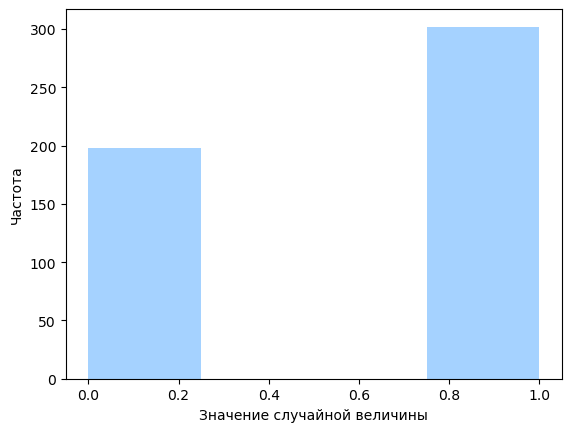

In [5]:
from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=500,p=0.6)
ax = sns.distplot(data,
                  kde = False,
                  color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

Также можно вывести количество неудач и попаданий в нашей модели:

In [6]:
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 198]
 [  1 302]]


## БИНОМИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Повторение нескольких независимых испытаний Бернулли называется **процессом Бернулли**. Результаты процесса Бернулли в свою очередь будут следовать **биномиальному распределению**.

>**Биномиальным называют** распределение, при котором возможны только два исхода (успех или неудача, выигрыш или проигрыш) и вероятность успеха и неудачи одинакова для всех испытаний. Однако исходы не обязательно должны быть равновероятными, и каждое испытание не зависит от других.

Параметры биномиального распределения — $n$ и $p$, где $n$ — общее количество испытаний, а $p$ — вероятность успеха в каждом испытании.

Для того чтобы оценить вероятность, что среди $n$ испытаний будет $k$ успехов, используют следующую формулу:

$P(X = k) = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1-p)^{n-k}$

$\begin{pmatrix} n \\ k \end{pmatrix}$ - называют **биномиальным коэффициентом**, и он вычисляется следующим образом:

Математическое ожидание биномиального распределения равно:

$EX = np$

Стандартное отклонение:

$\sigma_X = \sqrt{np (1-p)}$

>Сравним две рекламных кампании: в одной конверсия составляет 2 %, но баннер увидит 100 000 пользователей, а в другой конверсия 40 %, но охват — всего 5 000 пользователей.

У нас есть следующая величина для количества пользователей, кликнувших по рекламе в первом случае:

$X \sim Binomial (n_X  = 100000, p_X = 0.02)$

Случайная величина, отражающая количество пользователей, перешедших по рекламе, для второй рекламной кампании:

$Y \sim Binomial (n_Y = 5000, p_Y = 0.4)$

Математическое ожидание и разброс для первой кампании:

$EX = n_X p_X = 100000 \cdot 0.02 = 2000$

$\sigma_X = \sqrt{n_X p_X (1 - p_X)} = \sqrt{100000 \cdot 0.02 \cdot 0.98} \approx 44 \ человека$

Математическое ожидание и разброс для второй кампании:

$EY = n_Y p_Y = 5000 \cdot 0.4 = 2000$

$\sigma_Y = \sqrt{n_Y p_Y (1 - p_Y)} = \sqrt{5000 \cdot 0.42 \cdot 0.6} \approx 34 \ человека$

Получаем, что ожидаемое количество кликов в обеих кампаниях одинаковое, так что более выгодным вариантом было бы выбрать менее затратную с финансовой точки зрения.

>Производитель гаджетов знает, что 20 % производимых им товаров — бракованные.
>
>Если он производит десять изделий в день, какова вероятность того, что не более двух из них бракованные?

Для решения этой задачи мы уже будем использовать формулу $P(X = k) = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1-p)^{n-k}$ и вычислять вероятность того, что за день производится от восьми до десяти небракованных изделий:

$\begin{pmatrix} 10 \\ 8 \end{pmatrix} (0.8)^8 (0.2)^2 + \begin{pmatrix} 10 \\ 9 \end{pmatrix} (0.8)^9 (0.2)^1 + \begin{pmatrix} 10 \\ 10 \end{pmatrix} (0.8)^{10} \approx 0.678$

Конечно, это выражение очень сложное с точки зрения вычислений, поэтому для нахождения ответа можно воспользоваться специальными функциями `Python`:



In [7]:
import scipy

scipy.stats.binom.pmf(8,10,0.8)+scipy.stats.binom.pmf(9,10,0.8)+scipy.stats.binom.pmf(10,10,0.8)

0.6777995264

Получаем, что с вероятностью $0.678$ будет производиться не более двух бракованных изделий в день.

Как и для распределения Бернулли, для биномиального распределения можно смоделировать какое-то количество попыток и получить результат. Например, можно смоделировать биноминальное распределение с параметром $p = 0.5$ и количеством испытаний, равным $10$, и реализовать $1000$ попыток:

C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_16748\2112502192.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)


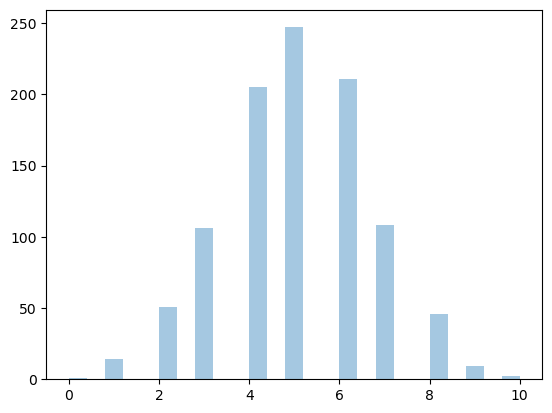

In [9]:
import matplotlib.pyplot as plt
from numpy import random

x = random.binomial(n=10, p=0.5, size=10)

sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)

plt.show()

## РАСПРЕДЕЛЕНИЕ ПУАССОНА

>Распределение Пуассона — это дискретное распределение вероятностей числа событий, происходящих в данный период времени, с учётом среднего количества раз, когда событие происходит за этот период времени.

Допустим, у нас есть ресторан быстрого питания, в который приходят  в среднем Три посетителя в минуту. Однако это всего лишь средний показатель — фактический показатель может варьироваться.

Распределение Пуассона можно использовать для анализа вероятности различных событий, касающихся того, сколько клиентов придёт в ресторан. С его помощью можно рассчитать вероятность затишья (когда в течение какого-то периода времени не будет ни одного клиента), а также вероятность всплеска активности (когда в ресторан за минуту придут пять и более клиентов). Эта информация, в свою очередь, может помочь менеджеру спланировать рабочую нагрузку и график сотрудников, а также план по закупкам продуктов.

Кроме использования в планировании нагрузки на персонал и производство, распределение Пуассона также используется в биологии (обнаружение мутаций), финансах (прогнозирование количества заявлений о банкротстве или просрочек кредитов), информационной безопасности (предсказание количества вирусных атак) и любой другой ситуации, в которой события не зависят от времени.

В распределении Пуассона значение случайной величины может быть любым неотрицательным числом.  Случайная величина будет обладать следующими характеристиками:

$EX  = \lambda$

$\sigma_X = \sqrt{\lambda},$

где $\lambda$ — ожидаемое число событий за период времени.

Чтобы рассчитать вероятность того, что за период времени произойдёт $k$ событий, можно пользоваться следующей формулой:

$P(X = k) = \frac{\lambda^k e^{- \lambda}}{k!}$

Колл-центр получает в среднем 4.5 звонка за каждые пять минут. Каждый оператор может обработать один из этих вызовов в течение пяти минут. Если вызов получен, но оператор  не может его принять, то вызывающий абонент будет переведён в режим ожидания ответа.

Если вызовы следуют распределению Пуассона, какое минимальное количество операторов необходимо колл-центру, чтобы вызовы удерживались в ожидании ответа не более 10 % времени?

Рассчитаем вероятности для всех возможных количеств операторов, пока не получим вероятность того, что вызов находится на удержании, которая будет меньше 10 %:

<img src=m7_img10.png>

В качестве параметра $\lambda$ мы берём среднее количество звонков, так как это наше ожидаемое число событий, а в качестве  — количество операторов, т. к. в данный период времени мы сможем принять столько звонков (один оператор принимает один звонок).

Получаем, что колл-центру необходимо нанять на работу хотя бы семь операторов.

Разумеется, все эти значения можно было бы рассчитать намного проще с использованием функций Python. Например, для пяти операторов мы бы получили следующее выражение:

In [29]:
import scipy

scipy.stats.distributions.poisson.pmf(5, 4.5)


0.17082685848611215

Также можно смоделировать распределение Пуассона. Например, будем рассматривать 1000 реализаций случайной величины, у которой $\lambda = 3$:

C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_16748\2227624355.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.poisson(lam=3, size=1000), kde=False)


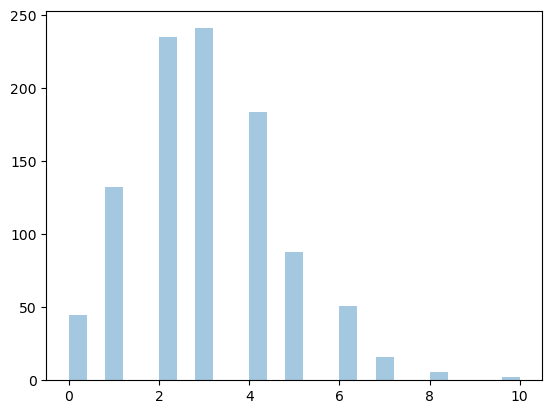

In [11]:
from numpy import random

sns.distplot(random.poisson(lam=3, size=1000), kde=False)

plt.show()

## Файл `Дискретные_распределения.ipynb`

# 9. Неприрывные распределения <a class="anchor" id=9></a>

[к содержанию](#0)

Представьте, что вы анализируете процессы всемирного потепления, и вам необходимо фиксировать точные значения температуры в разных точках планеты. Разумеется, у вас есть сверхточные инструменты, поэтому температура может принимать огромный спектр значений: не просто 23 или 24 градуса, а 23.14, 23.5 или даже 23.4582 градуса. В таком случае даже очень большая и подробная таблица не сможет описать все возможные значения, вероятность каждого конкретного значения размывается, и работать с моделью становится сложно.

Для таких ситуаций существует **непрерывная модель.** В ней распределение вероятностей задаётся не таблицей, а с помощью функции **плотности вероятности**.

Плотностью может быть любая неотрицательная функция, площадь которой под графиком равна 1 (так как сумма вероятностей всех исходов равна 1) и которая удовлетворяет некоторым условиям. Эти условия мы не будем обсуждать в данном юните, так как они выходят за рамки курса из-за сложной математической составляющей, однако если вам интересно разобраться в этом, рекомендуем ознакомиться со [следующим материалом](http://www.mathprofi.ru/nepreryvnaya_sluchaynaya_velichina.html).

В дискретном случае мы без проблем вычисляли вероятность, но тут задача становится сложнее. Однако нам всё равно необходимо научиться это делать.

Возвращаясь к примеру с температурой: если мы ведём наблюдения за климатом, то нам интересно не только записывать текущие результаты, но и, например, предсказывать погоду на будущее — для этого необходимо вычислять вероятности.

Для того чтобы вычислить вероятность для непрерывной случайной величины, необходимо найти площадь под графиком плотности в заданном промежутке. Например, на графике ниже заштрихована вероятность того, что значение $X$ лежит в интервале от $1$ до $3$:

<img src=m7_img11.png width=400>

Такой способ нахождения вероятности должен быть интуитивно понятен. Если вся площадь равна единице, то вся площадь выражает собой сумму вероятностей для всех исходов. Когда мы выделяем только часть исходов, то берём площадь только для них и получаем ту долю от единицы, которую составляют эти исходы от всех возможных.

Как и в дискретном случае, мы рассмотрим основные непрерывные распределения:

* равномерное;
* нормальное;
* экспоненциальное.

## РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ

В предыдущем юните мы рассмотрели дискретное равномерное распределение, однако существует ещё и непрерывное равномерное распределение.

Непрерывная случайная величина $X$ распределяется равномерно, если вероятность попадания $X$ в интервал пропорциональна длине этого интервала. То есть, к примеру, если мы рассматриваем все числа от $1$ до $100$ и ищем вероятность попадания в интервал от $1$ до $10$, то вероятность равна $0.1$, а для интервала от $1$ до $30$ — $0.3$.

>Равномерная непрерывная случайная величина используется в различных экономических моделях. Например, при выпуске в продажу нового товара для управления необходимыми запасами на складе на первых этапах используют равномерное непрерывное распределение. Это делают следующим образом: прогнозируют спрос на товар на основании различных факторов (например, по времени года, населению и т. д.) и моделируют показатель спроса равномерным распределением на первые дни и недели продажи товара.
>
>Кроме того, равномерную непрерывную случайную величину используют для генерации случайных чисел, если подходят любые вещественные значения. Генерация случайных чисел (по сути, генерация «шума»), в свою очередь, используется для того, чтобы получать из маленькой выборки бόльшую (это называется **аугментацией**): если вы умеете генерировать непрерывные распределения (в том числе равномерное), то можете искусственно увеличить объём ваших данных и повысить качество модели.

Случайная величина, которая распределена по непрерывному равномерному закону, может принимать в качестве значения любое вещественное число в заданном отрезке от $a$ до $b$ и имеет следующее математическое ожидание и среднеквадратичное отклонение:

$EX = \frac{a+b}{2}$

$\sigma_X = \frac{b-a}{\sqrt{12}}$

Предположим, что распределение определено на отрезке от 4 до 8 и нам нужно найти для него математическое ожидание и стандартное отклонение.

Для начала найдём математическое ожидание. В качестве $a$ подставляем $4$, а вместо $b$ — $8$. Получаем $(4+8)/2 = 6$. Это значит, что среднее (взвешенное по вероятностям возможных значений) значение нашей случайной величины — это $6$.

Также вычислим стандартное отклонение. Мы уже выяснили, что $a=4$, $b=8$. Значит, осталось только выполнить расчёты:

$\frac{(8-4)}{\sqrt{12}} \approx 1.16$

Ранее мы говорили, что для того, чтобы найти плотность попадания в какой-то интервал, необходимо использовать плотность распределения. Здесь она постоянна и имеет следующий вид:

$f(x)=\left\{\begin{matrix} 0, \; при \; x<a, \; x>b \\ \frac{1}{b-a}, \; при \; a \leq x \leq b \\ \end{matrix}\right.$

Это значит, что для любых точек вне рассматриваемого интервала вероятность попасть в него равна нулю, а для точек внутри интервала вероятность равна $1/(b-a)$. Для примера, рассмотренного ранее, вероятность попасть в единичный интервал из промежутка от $4$ до $8$ равна $1/(8-4) = 0.25$.

Мы можем с помощью Python смоделировать случайную величину c таким распределением и визуализировать плотность её распределения. К примеру, сформируем выборку объёмом 10000 для распределения с параметрами $a=10$ и $b=40$:

C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_16748\1981893288.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


[Text(0.5, 0, 'Равномерное распределение'), Text(0, 0.5, 'Плотность')]

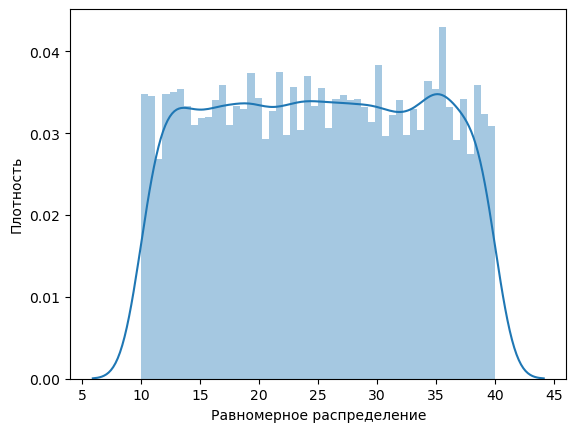

In [22]:
from scipy.stats import uniform

data = uniform.rvs(size=10000, loc = 10, scale=30)
ax = sns.distplot(data,
                  bins=50)
ax.set(xlabel='Равномерное распределение', ylabel='Плотность')

По графику плотности распределения видно, что в рамках интересующего нас интервала все значения сгенерированы примерно с одной частотой. Разумеется, есть некоторые колебания, но с реальными данными у вас всегда будет получаться именно такая картина, отличная от идеального теоретического предположения.

## НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

>**Нормальное распределение** (его ещё называют **гауссовским** или **распределением Гаусса**) представляет собой распределение вероятностей, обычно используемое для моделирования таких явлений, как физические характеристики (например, рост, вес и т. д.) или результаты тестирований.

Кроме того, что по нормальному закону распределены многие величины, нормальное распределение очень часто используется в статистике и машинном обучении, чтобы проверить корректность построенной в модели. К примеру, вы уже отлично умеете решать задачу регрессии и, конечно же, знаете, что такое остатки (или их ещё называют отклонениями или ошибками) — разница между реальными и предсказанными значениями. Оказывается, чтобы убедиться, что модель корректная, необходимо собрать все эти остатки и проверить, распределены ли они по нормальному закону. Это можно сделать и визуально — форма нормального распределения легко узнаваема и выглядит следующим образом:

Обычно гауссовское распределение определяется через математическое ожидание и стандартное отклонение — это записывается следующим образом:

$X \sim Normal (\mu, \sigma^2)$

Эту запись можно прочитать как «случайная величина $X$ распределена по нормальному закону с математическим ожиданием $\mu$ и стандартным отклонением $\sigma$».

Плотность нормального распределения задаётся формулой:

$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{(x - \mu)^2}{2 \sigma^2}}$

В математике считается, что если мы возьмём много разных случайных величин, которые являются независимыми (или слабо зависимыми друг от друга), то они образуют нормальное распределение. Это утверждение называется **центральной предельной теоремой (ЦПТ)**.

Центральная предельная теорема является буквально сердцем статистики, а также всей концепции проверки статистических гипотез. Именно благодаря ей мы имеем возможность реализовывать различные статистические критерии, например проводить A/B-тесты, с помощью которых можно оценить, правда ли один рекламный ролик эффективнее, чем другой, или выявить, какой интерфейс интернет-магазина больше стимулирует людей к покупкам.

>Во многом именно благодаря этой теореме нормальные распределения являются подходящей аппроксимацией, даже если известно, что основное распределение не является нормальным.

Это удобно, так как с помощью нормального распределения легко получить вероятностные оценки.

Существует **эмпирическое правило трёх сигм**, которое гласит:

* Если отступить от среднего на одно стандартное отклонение в меньшую и большую сторону, то в этих пределах будет 68 % данных.
* Если отступить от среднего на два стандартных отклонения в меньшую и большую сторону, то в этих пределах будет 95 % данных.
* Если отступить от среднего на три стандартных отклонения в меньшую и большую сторону, то в этих пределах будет 99.7% данных.

Эта идея также проиллюстрирована ниже:

<img src=m7_img12.png width=600>

Это знание даёт нам много полезной информации. К примеру, мы знаем, что по результатам работы сотрудников колл-центра среднее количество продаж составило 100, а стандартное отклонение — 10. Исходя из этих данных, мы моментально можем вычислить, что это значит, что 68 % персонала смогли сделать от 90 до 110 продаж, 95 % — от 80 до 120, а 99.7 % — от 70 до 130. Здесь мы понимаем, что если кто-то смог реализовать не более 70 продаж, то он явно справляется с обязанностями гораздо хуже, чем его коллеги. Если есть те, у кого более 130 продаж, — это самые ценные сотрудники, и их стоит поощрить бонусами.

Кроме того, нормальное распределение обладает рядом сильно упрощающих жизнь характеристик, многие из которых можно наблюдать на приведённом выше графике: он симметричный и «одновершинный», что означает, что его среднее значение, медиана и мода равны, то есть можно сделать вычисления для одной меры и получить сразу три.

Также очень важно иметь представление о нормальном распределении, так как многие статистические критерии (например, те, которые используются для A/B-тестов) могут быть реализованы только для нормально распределённых данных.

Давайте смоделируем нормальное распределение с математическим ожиданием, равным , и стандартным отклонением, равным , и посмотрим, какой вид оно примет.

C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_16748\2452947486.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


[Text(0.5, 0, 'Нормальное распределение'), Text(0, 0.5, 'Плотность')]

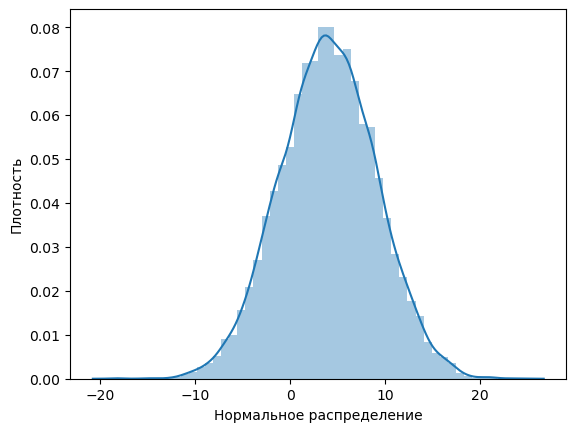

In [23]:
from scipy.stats import norm

data = norm.rvs(size=10000,loc=4,scale=5)
 
ax = sns.distplot(data,
                  bins=50)
ax.set(xlabel='Нормальное распределение', ylabel='Плотность')

Мы видим, что распределение не выстраивается в идеально гладкий «колокол», но очень близко к этой форме.

→ Когда вы в будущем будете реализовывать статистические тесты, для которых необходимо соответствие нормальному распределению, вы сможете подобным образом оценивать форму распределения для ваших данных.

Среди всех нормальных распределений выделяют одно особенное — стандартное нормальное. У него нулевое среднее и единичная дисперсия.

График его плотности изображён ниже:

<img src=m7_img13.png width=600>

Это своего рода эталон нормальных распределений.

Для нас представляет интерес переход от произвольного нормального распределения к стандартному.

Если у нас есть нормальное распределение, то, чтобы свести его стандартному, необходимо из каждого значения вычесть среднее и разделить на стандартное отклонение:

$z = \frac{X - \mu}{\sigma}$

Чем это может быть полезно? Допустим, нам нужно сравнить результаты тестирования двух групп студентов, которые сдавали разные экзамены на знание английского языка, TOEFL и IELTS. Первый экзамен оценивается по шкале от 0 до 120, а второй — от 0 до 9. Как сравнить результаты, измеренные в разных единицах, между собой? Здесь нам и помогает стандартизированное распределение. Если мы переведём оценки обеих групп студентов в так называемые -оценки, то сможем сравнить результаты между группами. 

Такая стандартизация используется также в машинном обучении, чтобы привести признаки к одной шкале измерения — это сильно повышает качество моделей. Вы уже сталкивались с подобной процедурой, когда делали шкалирование признаков.

С помощью Python мы можем стандартизировать данные следующим образом:

In [24]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
data = asarray([[93, 44],
                [4, 2],
                [36, 1],
                [14, 29],
                [78, 21]])
print(data)
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

[[93 44]
 [ 4  2]
 [36  1]
 [14 29]
 [78 21]]
[[ 1.37243726  1.50201177]
 [-1.17229016 -1.06239857]
 [-0.25733199 -1.12345596]
 [-0.88636573  0.58615094]
 [ 0.94355062  0.09769182]]


## ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

>**Экспоненциальное распределение** — это распределение вероятностей времени между событиями в процессе Пуассона.

Как вы помните, в процессе Пуассона нам известно, сколько событий происходит за какой-то промежуток времени.

В реальной жизни интервалы времени между событиями обычно разные. Например, если мы анализируем количество поступающих на рабочую почту писем, то оно может быть разным в зависимости от дня и времени суток. Но если мы возьмём небольшой временной интервал, в течение которого скорость примерно постоянная, например с 10:30 до 14:30 в понедельник, экспоненциальное распределение можно использовать как хорошую приблизительную модель для времени до поступления следующего письма.

>Значениями случайной величины, распределённой по экспоненциальному закону, являются любые вещественные неотрицательные числа.

Плотность экспоненциального распределения задаётся следующей формулой:

$f(x) = \left\{\begin{matrix} 0, & x < 0 \\ \lambda e^{- \lambda x}, & x \geq 0 \\ \end{matrix}\right.$

В качестве параметра $\lambda$ здесь берётся ожидаемое число событий за единицу времени.

С помощью Python мы можем смоделировать экспоненциальное распределение так:

C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_16748\355510432.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


[Text(0.5, 0, 'Экспоненциальное распределение'), Text(0, 0.5, 'Плотность')]

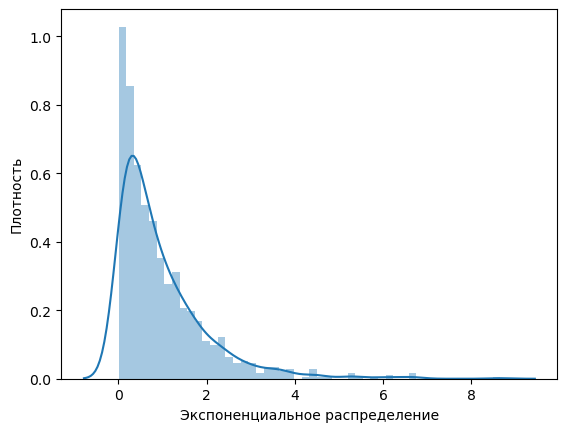

In [25]:
from scipy.stats import expon

data = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.distplot(data,
                  bins=50)
ax.set(xlabel='Экспоненциальное распределение', ylabel='Плотность')

Математическое ожидание для этого распределения вычисляется по следующей формуле:

$EX =  1/ \lambda$

Стандартное отклонение можно найти ровно так же:

$\sigma_X =  1/ \lambda$

Вероятность того, что значение случайной величины будет не больше $x$, равна:

$1 - e^{- \lambda x}$

>Известно, что количество дней, за которые путешественники покупают авиабилеты, может быть смоделировано экспоненциальным распределением со средним количеством времени, равным 15 дням.
>
>Найдите вероятность того, что путешественник купит билет менее чем за 10 дней до поездки.

Применим для решения задачи формулу, которую рассмотрели выше:

$P(X < 10) = 1 - e^{- \lambda 10} = 0.4865$

В качестве параметра распределения здесь используется $\lambda = 1/15$.

Получаем, что с вероятностью $0.49$ случайно выбранный путешественник купит авиабилет менее чем за 10 дней до рейса.

# 10. Итоги <a class="anchor" id=10></a>

[к содержанию](#0)

В качестве **дополнительной литературы** рекомендуем вам ознакомиться со следующими источниками:

* [Парадоксы теории вероятностей](https://theoryandpractice.ru/posts/7518-paradoks-probability)
* [Статья про теорию вероятности в анализе данных](https://habr.com/ru/post/351400/)
* [Статья про создание случайного безопасного пароля](https://habr.com/ru/company/cloud4y/blog/347952/)
* [Статья про случайные и псевдослучайные последовательности](https://habr.com/ru/company/securitycode/blog/273629/)
* [Статья про теорию вероятностей и законы подлости](https://habr.com/ru/post/431706/)
* [Статья про принятие решений на основе интуиции и с помощью теории вероятностей](https://habr.com/ru/post/411659/)
* [Статья про пуассоновский процесс и конверсию сайта](https://habr.com/ru/company/nerepetitor/blog/253755/)
* Л. Млодинов «(Не)Совершенная случайность. Как случай управляет нашей жизнью» (истоки теории вероятностей и статистики и объяснение многих ключевых понятий и теорем «на пальцах»)